# Introduction to Statistics in Python

## Chapter 3: More Distributions and the Central Limit Theorem

In [11]:
import numpy as np
from math import sqrt
import pandas as pd
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [12]:
HRB = pd.read_csv("HRB.csv", index_col=0)
HRB.index = pd.PeriodIndex(HRB.index, freq="Q").to_timestamp() + pd.offsets.QuarterBegin(startingMonth=1)
HRB

,Earnings
Quarter,
2007-04-01,-0.36
2007-07-01,-0.38
2007-10-01,0.07
2008-01-01,1.85
2008-04-01,-0.34
2008-07-01,-0.42
2008-10-01,0.02
2009-01-01,2.11
2009-04-01,-0.39


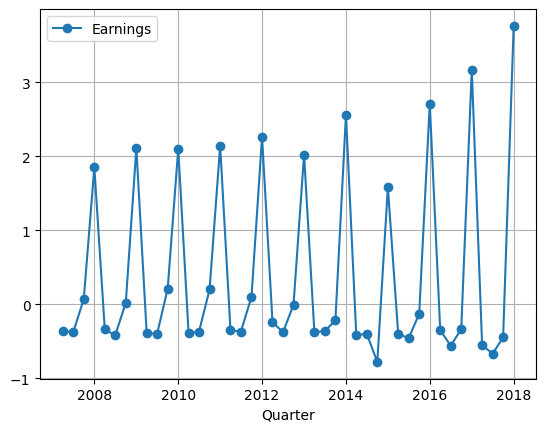

In [13]:
fig, ax = plt.subplots()

ax.plot(HRB.index, HRB["Earnings"], "o-", label="Earnings")
ax.set(xlabel="Quarter")
ax.grid()
ax.legend()
plt.show()

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259 ]


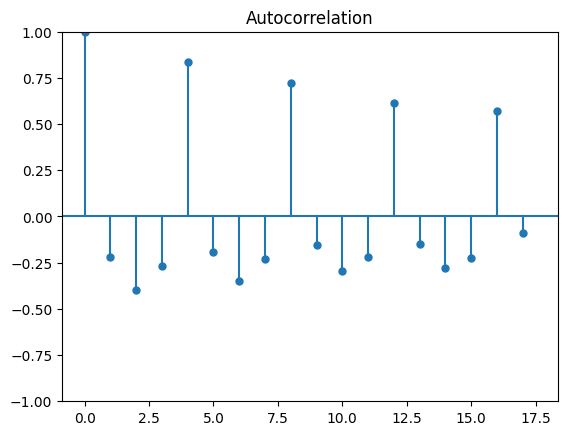

In [14]:
# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha = 1)
plt.show()

 Strong positive autocorrelation at lags 4, 8, 12, 16, 20, ...

In [15]:
MSFT = pd.read_csv("MSFT.csv", index_col=0)
MSFT.index = pd.to_datetime(MSFT.index)
MSFT

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351
...,...
2017-07-31,72.699997
2017-08-01,72.580002
2017-08-02,72.260002


In [16]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule="W").last()

# Compute the percentage change of prices
returns = MSFT.pct_change().dropna()
returns

,Adj Close
Date,
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508
2012-09-09,0.004218
2012-09-16,0.008400
...,...
2017-07-09,0.007689
2017-07-16,0.047797
2017-07-23,0.013877


The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


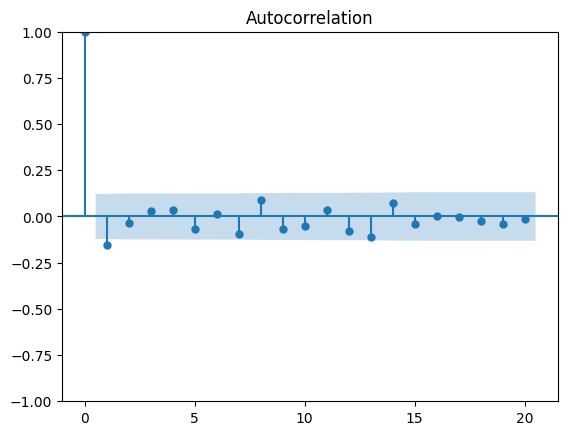

In [7]:
# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags = 20)
plt.show()

The autocorrelation with lag 1 is significantly negative, but none of the other lags are significantly different from zero.

The mean is 0.016 and the standard deviation is 0.052


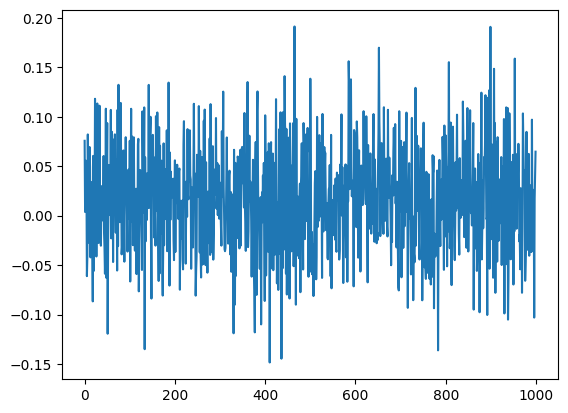

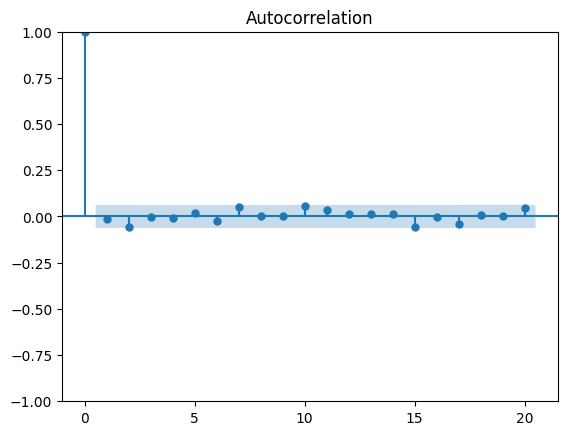

In [8]:
# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

Notice that for a white noise time series, all the autocorrelations are close to zero, so the past will not help you forecast the future.

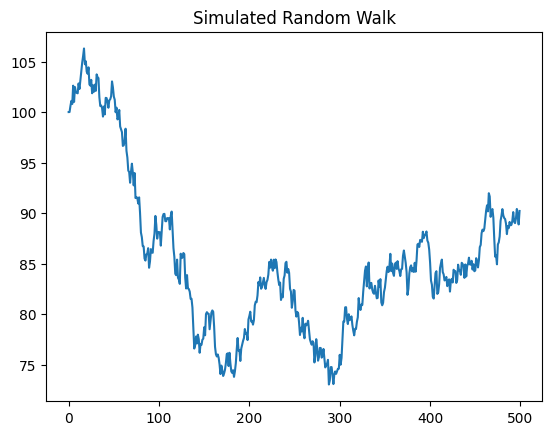

In [9]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

The simulated price series you plotted should closely resemble a random walk.

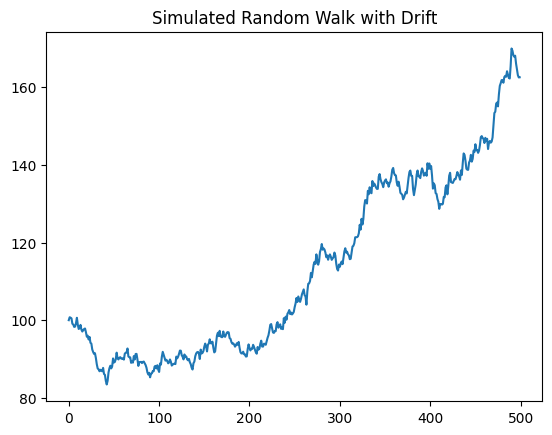

In [10]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

This simulated price series you plotted should closely resemble a random walk for a high flying stock.

In [19]:
AMZN = pd.read_csv("AMZN.csv", index_col=0)
AMZN.index = pd.to_datetime(AMZN.index)
AMZN

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083
...,...
2017-07-27,1046.000000
2017-07-28,1020.039978
2017-07-31,987.780029


In [20]:
# Run the ADF test on the price series and print out the results
results = adfuller(AMZN["Adj Close"])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.025168525770739, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


According to this test, we cannot reject the hypothesis that Amazon prices follow a random walk. In the next exercise, you'll look at Amazon returns.

In [21]:
# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret["Adj Close"])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.5655898083483425e-22


The p-value is extremely small, so we can easily reject the hypothesis that returns are a random walk at all levels of significance.

### Stationarity

- Random Walk is non-stationary series
    - First differences makes it stationary
- Seasonal series are also non-stationary
    - Seasonal differences makes it stationary
- Transforming options
    - If a time series is exponential and seasonal then:
        - make log transformation to remove the exponential
        - then apply seasonal stationary difference



            Earnings
Quarter             
2007-04-01       NaN
2007-07-01       NaN
2007-10-01       NaN
2008-01-01       NaN
2008-04-01      0.02
2008-07-01     -0.04
2008-10-01     -0.05
2009-01-01      0.26
2009-04-01     -0.05
2009-07-01      0.02


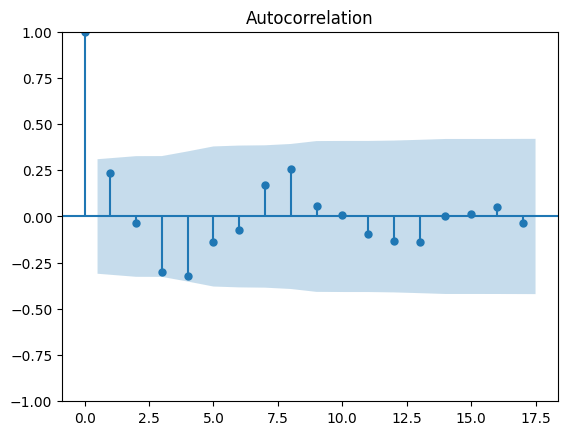

In [22]:
# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

By seasonally adjusting the series, we eliminated the seasonal pattern in the autocorrelation function.